In [1]:
!pip install face_recognition

...: [ 0.00091577  0.1519755   0.04991514 -0.07119548 -0.13051797  0.01793829
 -0.07292479 -0.03218708  0.16305244 -0.14076349  0.21797079 -0.08490383
 -0.26445702 -0.01312191 -0.00370017  0.24886547 -0.19538474 -0.19639133
 -0.04050592  0.03957704  0.08861461  0.06802295  0.00225712  0.03867903
 -0.08922365 -0.3404772  -0.08747765 -0.03205617  0.00663586 -0.12496556
 -0.01183805  0.01597194 -0.13956305 -0.00211321  0.11027914  0.11272381
 -0.0539159  -0.16030881  0.16716802 -0.00365823 -0.35501939  0.04588262
  0.13778245  0.2258527   0.17014535  0.03938167 -0.02116365 -0.15054287
  0.10140806 -0.20384586  0.05812786  0.17318182  0.08254007  0.12605749
  0.03637849 -0.17656152  0.03503541  0.14528322 -0.14729472 -0.04021285
  0.11410134 -0.01564937  0.08391375 -0.09355345  0.21741606  0.06750083
 -0.12805349 -0.25128984  0.09877642 -0.18613237 -0.13829789  0.1494402
 -0.17782651 -0.17527503 -0.27665314 -0.02712303  0.30935505  0.11874125
 -0.10783045  0.03137513  0.03567006  0.0195524

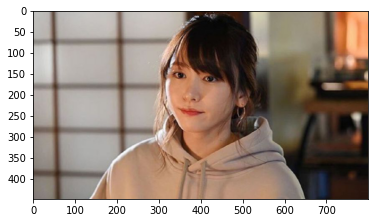

In [2]:
import face_recognition
import matplotlib.pyplot as plt
# matplotlib(畫圖)
%matplotlib inline
# face_recognition.load_image_file 自動查詢圖片中的所有面部
img = face_recognition.load_image_file("新垣結衣.jpg")
# face_recognition.face_encodings 識別影象中的面部並識別它們是誰
en = face_recognition.face_encodings(img)

print("...:",en[0])
plt.imshow(img)

In [3]:
import glob
subs = ["jpg", "png", "jpeg"]

names, encodings = [], []
for fn in glob.glob("*"):
    sub = fn.split(".")[-1]
    if sub.lower() in subs:
        n = fn.split(".")[0]
        names.append(n)
        img = face_recognition.load_image_file(fn)
        en = face_recognition.face_encodings(img)[0]
        encodings.append(en)
print(names)
print(encodings)

['周杰倫', '楊丞琳', '阿信', '新垣結衣']
[array([-0.10506395,  0.19111452,  0.04072183,  0.01869638, -0.10777971,
       -0.0050939 , -0.03010004, -0.10976239,  0.09610739, -0.0486697 ,
        0.18455228, -0.01408302, -0.19514042, -0.10063679, -0.04600161,
        0.1302193 , -0.17318584, -0.16612969, -0.05751251,  0.0260905 ,
        0.14205295,  0.05578321,  0.06918418,  0.05570429, -0.07575096,
       -0.36651301, -0.03916371, -0.09507425,  0.02263917, -0.00225604,
       -0.03026734,  0.02283214, -0.25221455, -0.10413951,  0.04807194,
        0.08434556, -0.01203681, -0.03427611,  0.19095606, -0.02305801,
       -0.20087351,  0.10746627,  0.05089019,  0.31101021,  0.18190414,
        0.03478288,  0.02192239, -0.12079434,  0.10820661, -0.21008107,
        0.10596906,  0.16072662,  0.09289717,  0.05569475,  0.01648307,
       -0.15566707,  0.08582587,  0.02779436, -0.10618527,  0.01903268,
        0.1240418 , -0.03300899,  0.01162905, -0.029877  ,  0.18468222,
        0.006184  , -0.03123163, -

請輸入網址:https://obs.line-scdn.net/0hhFAj_lruN2l8ExwEe2xIPkZFNAZPfyRqGCVmaj99aV0EIiA-EHZxXFATbAlXJnA3EiF7ClgULFgBJnc9QHVx/w644


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


跟 周杰倫 的距離: 0.7187734899108262
跟 楊丞琳 的距離: 0.6227042263286681
跟 阿信 的距離: 0.6342489632349425
跟 新垣結衣 的距離: 0.4486869509826087
應該是: 新垣結衣
--------------------------------------------------
跟 周杰倫 的距離: 0.8111562075304017
跟 楊丞琳 的距離: 0.7148458031592708
跟 阿信 的距離: 0.7301192239180735
跟 新垣結衣 的距離: 0.47002053113215114
應該是: 新垣結衣
--------------------------------------------------


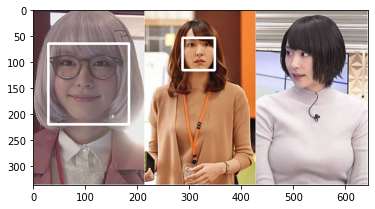

In [4]:
import requests
import cv2
url = input("請輸入網址:")
response = requests.get(url,stream=True, verify=False)
img = face_recognition.load_image_file(response.raw)
ens = face_recognition.face_encodings(img)
# face_recognition.face_locations 查詢面部
locs = face_recognition.face_locations(img)
for top, right, bottom, left in locs:
    # 圖片, 左上座標, 右下座標, 顏色, 粗細
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), 4)
# print(ens)
# print(locs)
for en in ens:
    # print(en)
    distances = face_recognition.face_distance(en, encodings)
    # print(distances)
    for n, d in zip(names, distances):
        print("跟", n, "的距離:", d)
    idx = distances.argmin(axis=-1)
    # print(idx)
    print("應該是:", names[idx])
    print("-" * 50)

plt.imshow(img)